Get state boundary data from census.gov: [cb_2015_us_state_20m.zip](http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_us_state_20m.zip)

In [1]:
!wget http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_us_state_20m.zip -N

--2016-10-11 16:42:24--  http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_us_state_20m.zip
Resolving www2.census.gov (www2.census.gov)... 96.7.83.108, 2600:1408:1d:2a1::208c, 2600:1408:1d:28b::208c
Connecting to www2.census.gov (www2.census.gov)|96.7.83.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191008 (187K) [application/zip]
Server file no newer than local file ‘cb_2015_us_state_20m.zip’ -- not retrieving.



In [2]:
!unzip cb_2015_us_state_20m.zip

Archive:  cb_2015_us_state_20m.zip
replace cb_2015_us_state_20m.shp.ea.iso.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Use fiona library to read shape file

In [7]:
import fiona
us_states = fiona.open('cb_2015_us_state_20m.shp')

Use shapely for point-in-polygon testing

In [8]:
from shapely.geometry import Polygon, Point

In [9]:
texas_geometry = [state.get('geometry').get('coordinates')[0] 
                  for state in us_states if state.get('properties')['NAME'] == 'Texas'][0]

texas = Polygon(texas_geometry)

Look up some test points from [NASA lat-long finder](https://mynasadata.larc.nasa.gov/latitudelongitude-finder/)

* San Antonio: 29.424122, -98.493628
* Houston: 29.760427, -95.369803
* Denver: 39.739236, -104.990251

In [10]:
cities = [
    ('San Antonio', Point(-98.493628, 29.424122)),
    ('Houston', Point(-95.369803, 29.760427)),
    ('Denver', Point(-104.990251, 39.739236))]

for city in cities:
    print(city[0] + ': ' + str(texas.contains(city[1])))


San Antonio: True
Houston: True
Denver: False


Given a point, determine what state it lies in

In [21]:
states = {}
for state in us_states:
    name = state.get('properties')['NAME']
    print('Creating poly for ' + name)
    try:
        poly = Polygon(state.get('geometry').get('coordinates')[0])
    except:
        poly = Polygon(state.get('geometry').get('coordinates')[0][0])
    states[name] = poly

Creating poly for Texas
Creating poly for California
Creating poly for Kentucky
Creating poly for Georgia
Creating poly for Wisconsin
Creating poly for Oregon
Creating poly for Virginia
Creating poly for Tennessee
Creating poly for Louisiana
Creating poly for New York
Creating poly for Michigan
Creating poly for Idaho
Creating poly for Florida
Creating poly for Alaska
Creating poly for Montana
Creating poly for Minnesota
Creating poly for Nebraska
Creating poly for Washington
Creating poly for Ohio
Creating poly for Illinois
Creating poly for Missouri
Creating poly for Iowa
Creating poly for South Dakota
Creating poly for Arkansas
Creating poly for Mississippi
Creating poly for Colorado
Creating poly for North Carolina
Creating poly for Utah
Creating poly for Oklahoma
Creating poly for Wyoming
Creating poly for West Virginia
Creating poly for Indiana
Creating poly for Massachusetts
Creating poly for Nevada
Creating poly for Connecticut
Creating poly for District of Columbia
Creating po

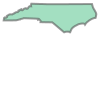

In [34]:
states['North Carolina']

In [37]:
def get_state(point):
    for state_name, state_poly in states.items():
        if state_poly.contains(Point(point)):
            return state_name
    return "unknown"

In [38]:
get_state((-98.493628, 29.424122))

u'Texas'

In [39]:
get_state((-104.990251, 39.739236))

u'Colorado'